In [79]:
import torch
import torch.nn as nn 
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np

In [80]:
# Step 1: Define character mappings

char_to_idx = {'A':0, 'B':1, 'C':2, 'D':3}

idx_to_char = {i: c for c , i in char_to_idx.items()}


input_indices = torch.tensor([2,1,0,0]) # 'C', 'B', 'A', 'A'

target_indices = torch.tensor([1,0,0,3])  # 'B', 'A', 'A', 'D'

In [81]:
# Step 2: Model definition

class CharRNN(nn.Module):

    def __init__(self, vocab_size, embed_dim,hidden_dim, output_dim):
        super(CharRNN, self).__init__()

        self.embedding = nn.Embedding(vocab_size, embed_dim)

        self.rnn = nn.RNN(embed_dim, hidden_dim, batch_first=True)

        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, hidden):

        x = self.embedding(x) # x: [batch_size, seq_len] -> [batch_size, seq_len, embed_dim]

        out, hidden = self.rnn(x, hidden)   # out: [batch_size, seq_len, hidden_dim]

        out = self.fc(out)     # out: [batch_size, seq_len, output_dim]

        return out, hidden

In [82]:
# Step 3: Hyperparameters and setup

vocab_size = 4

embed_dim = 8

hidden_dim = 16

output_dim = 4

In [83]:
model = CharRNN(vocab_size, embed_dim, hidden_dim, output_dim)

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [84]:
# Step 4: Prepare input

input_seq = input_indices.unsqueeze(0)  # [1, seq_len]

target_seq = target_indices.unsqueeze(0)  # [1, seq_len]

In [85]:
# Step 5: Training loop

n_epochs = 100

for epoch in range(1, n_epochs + 1):

    hidden = torch.zeros(1, 1, hidden_dim)

    optimizer.zero_grad()


    output , hidden = model(input_seq, hidden)  # output: [1, seq_len, vocab_size]

    output = output.squeeze(0)   # [seq_len, vocab_size]


    loss = loss_fn(output, target_indices)  # [seq_len]

    loss.backward()

    optimizer.step()


    if epoch % 20 == 0:

        print(f'Epoch: {epoch}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch: 20/100, Loss: 0.1305
Epoch: 40/100, Loss: 0.0139
Epoch: 60/100, Loss: 0.0064
Epoch: 80/100, Loss: 0.0045
Epoch: 100/100, Loss: 0.0035


In [86]:
# Step 6: Inference

with torch.no_grad():

    hidden = torch.zeros(1, 1, hidden_dim)

    output , hidden = model(input_seq, hidden) 

    predictions = torch.argmax(output, dim=2).squeeze(0)


    predicted_chars = [idx_to_char[i.item()] for i in predictions]

    target_chars = [idx_to_char[i.item()] for i in target_indices]


    print("\n Target Characters   :", target_chars)
    print(" Predicted Characters:", predicted_chars)


 Target Characters   : ['B', 'A', 'A', 'D']
 Predicted Characters: ['B', 'A', 'A', 'D']


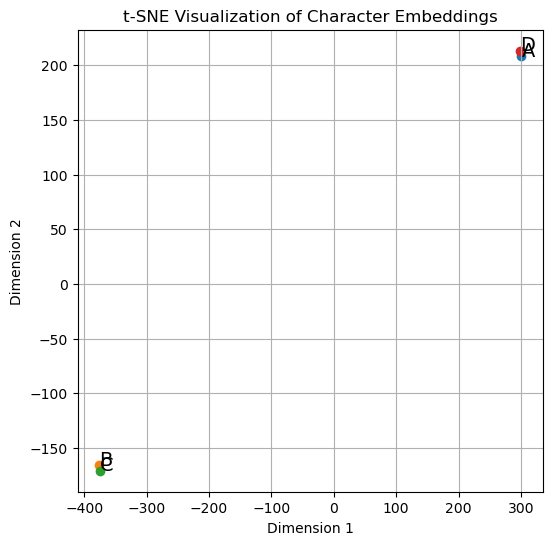

In [87]:
# Extract embeddings from the trained model

embeddings = model.embedding.weight.data.numpy()    # shape: [vocab_size, embed_dim]



# Reduce dimensions using t-SNE

tsne = TSNE(n_components=2, perplexity=1, random_state=42)

reduced_embeddings = tsne.fit_transform(embeddings)

# Plot the embeddings

plt.figure(figsize=(6,6))


for i , label in enumerate(char_to_idx.keys()):

    x, y = reduced_embeddings[i]

    plt.scatter(x,y)

    plt.text(x + 0.01, y + 0.01, label, fontsize=14)


plt.title("t-SNE Visualization of Character Embeddings")

plt.xlabel('Dimension 1')

plt.ylabel('Dimension 2')

plt.grid(True)

plt.show()

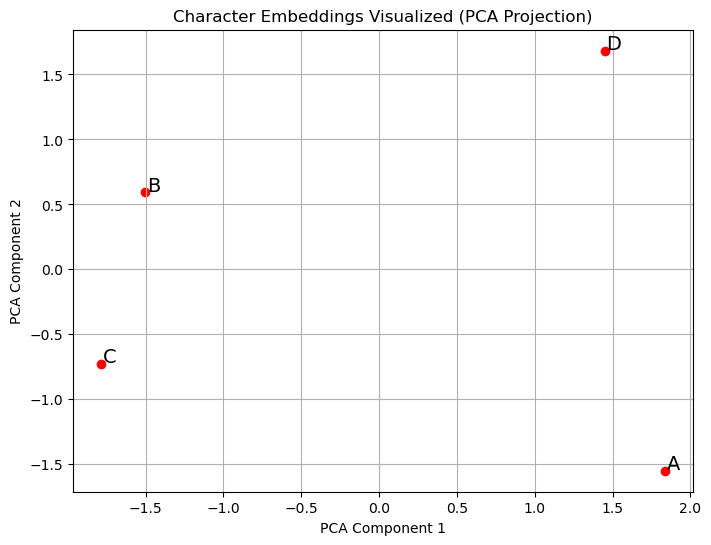

In [88]:
# Step 1: Get the embedding weights from the model

embedding_weights = model.embedding.weight.data.numpy()

# Step 2: Use PCA to reduce dimensionality to 2D for visualization

pca = PCA(n_components=2)

reduced_embeddings = pca.fit_transform(embedding_weights)


# Step 3: Plot

plt.figure(figsize=(8,6))

for i , char in enumerate(char_to_idx):

    x, y = reduced_embeddings[i]

    plt.scatter(x, y, marker='o', color='red')

    plt.text( x + 0.01, y + 0.01, char, fontsize=14)


plt.title("Character Embeddings Visualized (PCA Projection)")

plt.xlabel('PCA Component 1')

plt.ylabel('PCA Component 2')

plt.grid(True)

plt.show()